In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
X_train_clean = pd.read_csv("./X_train_clean.csv", index_col=0)
X_val_clean = pd.read_csv("./X_val_clean.csv", index_col=0)
X_test_clean = pd.read_csv("./X_test_clean.csv", index_col=0)
y_train = pd.read_csv("./y_train.csv", index_col=0)
y_val = pd.read_csv("./y_val.csv", index_col=0)
y_test = pd.read_csv("./y_test.csv", index_col=0)

In [3]:
print(X_train_clean.shape)
print(X_test_clean.shape)
print(X_val_clean.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3897, 12)
(1300, 12)
(1300, 12)
(3897, 1)
(1300, 1)
(1300, 1)


In [4]:
y_train_clean = to_categorical(y_train, num_classes=10)
y_val_clean = to_categorical(y_val, num_classes=10)
y_test_clean = to_categorical(y_test, num_classes=10)

In [5]:
print(y_train.iloc[0])
print(y_train_clean[0])
print(y_train_clean.shape[1])

quality    6
Name: 1413, dtype: int64
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
10


## Création du modèle de classification
Dans un premier temps, on crée un modèle qui réalise un classification sur 10 notes (quality).

In [6]:
input_dim = X_train_clean.shape[1]
output_dim = y_train_clean.shape[1]

In [7]:
def create_model():
  model = Sequential()

  model.add(Input(shape=(input_dim,)))

  model.add(Dense(20, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(40, activation="relu"))
  model.add(Dense(20, activation="relu"))

  model.add(Dense(output_dim, activation="softmax"))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  model.summary()

  return model


In [8]:
model = create_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,160 (12.34 KB)

 Trainable params: 3,160 (12.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
nb_epochs = 100

In [10]:
history = model.fit(X_train_clean,
          y_train_clean,
          epochs = nb_epochs,
          validation_data= (X_val_clean, y_val_clean),
          verbose=2
)

Epoch 1/100
122/122 - 3s - 24ms/step - accuracy: 0.4403 - loss: 1.5092 - val_accuracy: 0.4292 - val_loss: 1.2368
Epoch 2/100
122/122 - 1s - 6ms/step - accuracy: 0.4865 - loss: 1.2124 - val_accuracy: 0.5038 - val_loss: 1.1494
Epoch 3/100
122/122 - 0s - 2ms/step - accuracy: 0.5219 - loss: 1.1482 - val_accuracy: 0.5146 - val_loss: 1.1150
Epoch 4/100
122/122 - 1s - 5ms/step - accuracy: 0.5250 - loss: 1.1201 - val_accuracy: 0.5115 - val_loss: 1.1100
Epoch 5/100
122/122 - 0s - 2ms/step - accuracy: 0.5361 - loss: 1.1081 - val_accuracy: 0.5246 - val_loss: 1.0990
Epoch 6/100
122/122 - 0s - 2ms/step - accuracy: 0.5250 - loss: 1.1037 - val_accuracy: 0.5100 - val_loss: 1.1429
Epoch 7/100
122/122 - 0s - 2ms/step - accuracy: 0.5284 - loss: 1.1025 - val_accuracy: 0.5162 - val_loss: 1.0955
Epoch 8/100
122/122 - 0s - 2ms/step - accuracy: 0.5432 - loss: 1.0919 - val_accuracy: 0.5254 - val_loss: 1.0858
Epoch 9/100
122/122 - 0s - 3ms/step - accuracy: 0.5481 - loss: 1.0906 - val_accuracy: 0.5246 - val_loss

In [11]:
def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="accuracy", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_accuracy", ax=axes[1], color = "orange")

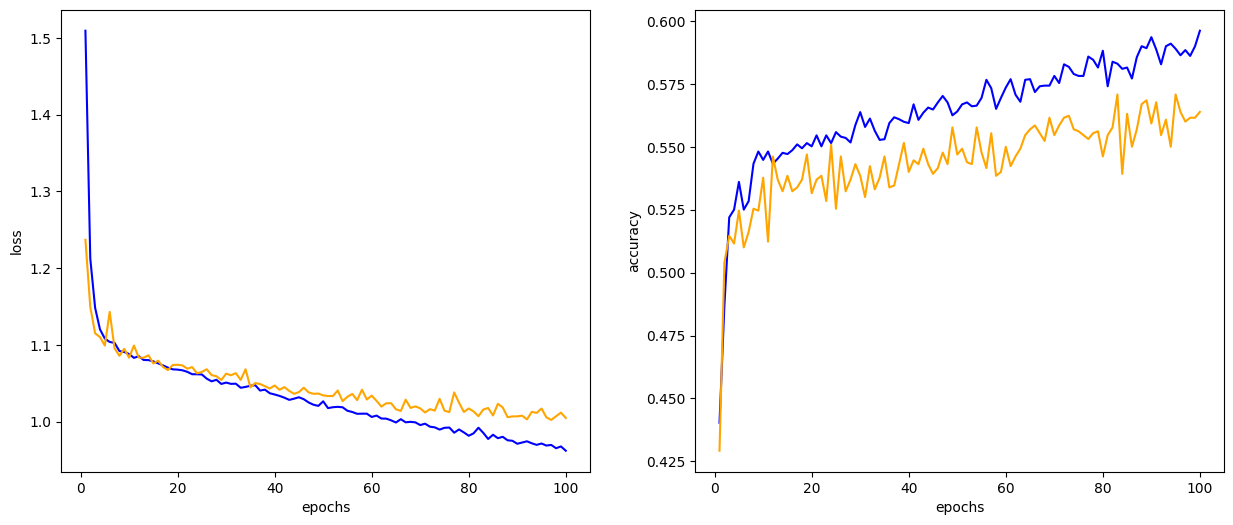

In [12]:
plot_history(history)

## Evaluation du modèle

In [13]:
loss, accuracy = model.evaluate(X_test_clean, y_test_clean)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5682 - loss: 1.0174 
Loss: 0.9690523743629456
Accuracy: 0.5884615182876587


Pour calculer les notes des vins prédites, on utilise la fonction `argmax`. En effet, la note de qualité est donnée par l'indice (+1) de la classe dont la probabilité est la plus élevée dans le vecteur sorti par le réseau.

In [14]:
y_pred = model.predict(X_test_clean)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


`y_pred` est une matrice de dimensions (nombre d'observations dans le jeu de test, nombre de classes) :

In [15]:
y_pred.shape

(1300, 10)

On crée un vecteur contenant les notes prédites avec la fonction `argmax`:

In [16]:
y_pred_final = np.argmax(y_pred,axis=1)+1

Ce vecteur peut être comparé à celui des vraies notes `y_test` avec une métrique MAE ou MSE:

In [17]:
mean_absolute_error(y_pred_final, y_test)

0.9961538461538462

Ce modèle de classification est donc moins performant pour prédire les notes de vin par rapport à celui réalisant une régression sur les notes (MAE ~= 0.16).

## Création du 2e modèle de classification
On fusionne d'abord les classes en 3 classes : "<6", "6" et ">6".

In [18]:
def merge_classes(y):
  return np.column_stack((np.where(y.values < 6, 1, 0) , np.where(y.values == 6, 1, 0) , np.where(y.values > 6, 1, 0)))

In [19]:
y_train_clean = merge_classes(y_train)
y_val_clean = merge_classes(y_val)
y_test_clean = merge_classes(y_test)

In [20]:
print(y_train_clean.shape)
print(y_val_clean.shape)
print(y_test_clean.shape)

(3897, 3)
(1300, 3)
(1300, 3)


In [21]:
input_dim = X_train_clean.shape[1]
output_dim = y_train_clean.shape[1]

In [22]:
model_2 = create_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 20)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,013 (11.77 KB)

 Trainable params: 3,013 (11.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
nb_epochs = 100

In [24]:
history = model_2.fit(X_train_clean,
          y_train_clean,
          epochs = nb_epochs,
          validation_data= (X_val_clean, y_val_clean),
          verbose=2
)

Epoch 1/100
122/122 - 2s - 18ms/step - accuracy: 0.4963 - loss: 1.0019 - val_accuracy: 0.5315 - val_loss: 0.9286
Epoch 2/100
122/122 - 1s - 5ms/step - accuracy: 0.5566 - loss: 0.8889 - val_accuracy: 0.5485 - val_loss: 0.9144
Epoch 3/100
122/122 - 0s - 4ms/step - accuracy: 0.5658 - loss: 0.8720 - val_accuracy: 0.5554 - val_loss: 0.8949
Epoch 4/100
122/122 - 1s - 5ms/step - accuracy: 0.5666 - loss: 0.8638 - val_accuracy: 0.5623 - val_loss: 0.8950
Epoch 5/100
122/122 - 1s - 5ms/step - accuracy: 0.5663 - loss: 0.8571 - val_accuracy: 0.5623 - val_loss: 0.8968
Epoch 6/100
122/122 - 1s - 5ms/step - accuracy: 0.5763 - loss: 0.8604 - val_accuracy: 0.5646 - val_loss: 0.8866
Epoch 7/100
122/122 - 0s - 4ms/step - accuracy: 0.5774 - loss: 0.8556 - val_accuracy: 0.5562 - val_loss: 0.8829
Epoch 8/100
122/122 - 0s - 3ms/step - accuracy: 0.5735 - loss: 0.8526 - val_accuracy: 0.5654 - val_loss: 0.8803
Epoch 9/100
122/122 - 0s - 2ms/step - accuracy: 0.5802 - loss: 0.8501 - val_accuracy: 0.5446 - val_loss

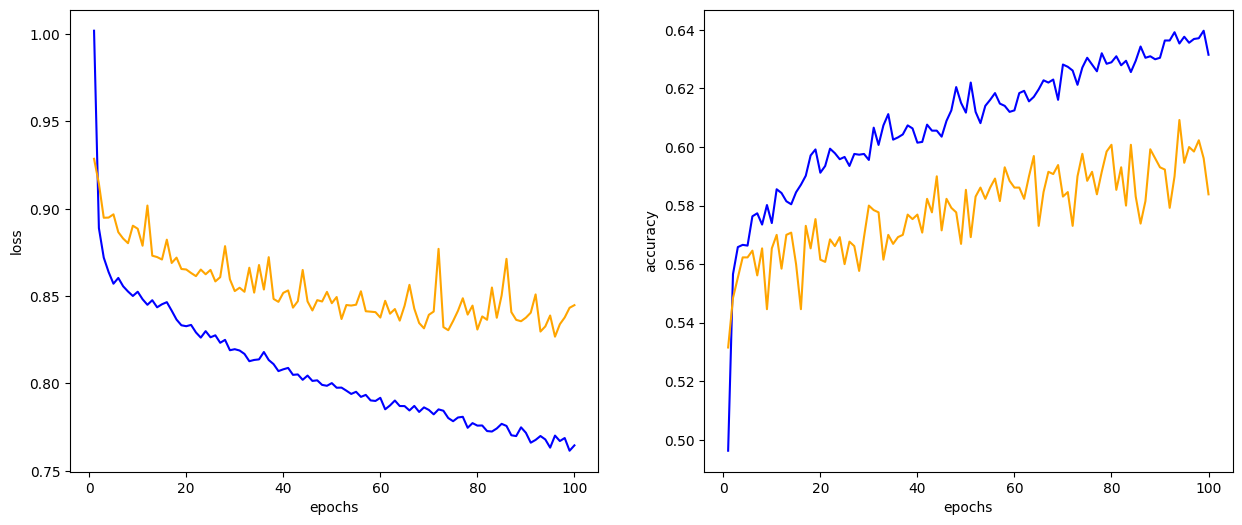

In [25]:
plot_history(history)

In [26]:
loss, accuracy = model_2.evaluate(X_test_clean, y_test_clean)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5935 - loss: 0.8262 
Loss: 0.7969306707382202
Accuracy: 0.6176922917366028


In [27]:
y_pred = model_2.predict(X_test_clean)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
y_pred_final = np.argmax(y_pred,axis=1)+1
y_test_final = np.argmax(y_test,axis=1)+1

In [29]:
mean_absolute_error(y_pred_final, y_test_final)

0.6538461538461539